In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import *

In [2]:
plot_marker={0:'o--k',1:'*--g',2:'s--r',3:'^--b',4:'v--m',5:'p--y',6:'P--c'}
Jac_type = {1:'Sacado ', 0:'Analytic ', 2:'Numerical '}

In [3]:
Nsp       = [1, 10, 50, 100, 500, 1000, 3000]#
output_host = 'n-butanol/HostTimes'
Nthreads  = [20, 40, 80, 160]

In [4]:
output_sacado="n-butanol/DeviceJacSacado"
vector_sacado= [1, 1,32, 32, 64 ]
team_sacado=[32, 64, 1, 2, 1]

In [5]:
output_source="n-butanol/DeviceSource"
vector_source= [32, 32, 64, 32]
team_source=[1, 2, 1, 8]

In [6]:
output_analytic="n-butanol/DeviceJacAnalytic"
vector_analytic= [32, 32, 32, 64]
team_analytic=[1, 2, 4, 1]

In [7]:
output_numerical ="n-butanol/DeviceJacNumFwd"
vector_numerical= [32, 32, 32, 64]
team_numerical=[1, 2, 4, 1]

In [8]:
sacado_team_vector = makeTeamVectorLabel(vector_sacado,team_sacado)
source_team_vector = makeTeamVectorLabel(vector_source, team_source)
analytic_team_vector  = makeTeamVectorLabel(vector_analytic, team_analytic)
numerical_team_vector = makeTeamVectorLabel(vector_numerical, team_numerical)

In [9]:
data           = readHostData(Nsp, Nthreads, output_host)
sacado_data    = readDeviceData(Nsp,vector_sacado, team_sacado, output_sacado)
source_data    = readDeviceData(Nsp,vector_source, team_source, output_source )
analytic_data  = readDeviceData(Nsp, vector_analytic, team_analytic, output_analytic)
numerical_data = readDeviceData(Nsp,vector_numerical, team_numerical, output_numerical)

File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty
File is empty


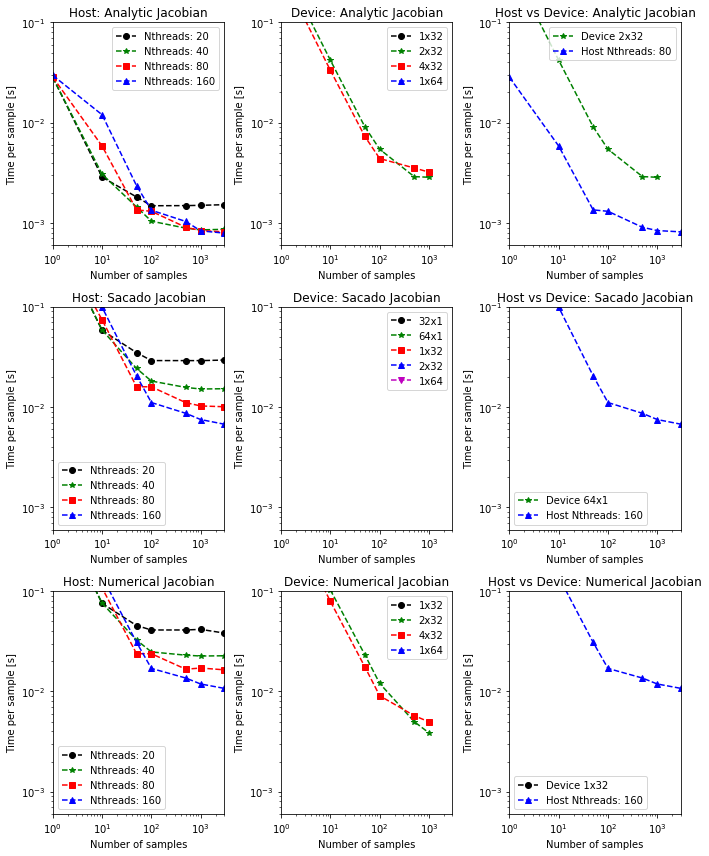

In [24]:
Npx=3
Npy=3
plt.figure(figsize=(10,Npx*4))
count_plot=1
x_label='Number of samples'
y_label='Time per sample [s]'
x_lim = [6e-4,1e-1]
y_lim = [1,3000]
   
plt.subplot(Npx, Npy, 1)
plt.title('Host: Analytic Jacobian')
for j in range(4):
    plt.plot(Nsp,data[1,:,j],plot_marker[j],label="Nthreads: "+str(Nthreads[j]))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(x_lim)
    plt.xlim(y_lim)
    plt.legend(loc='best')  
    plt.ylabel(y_label)
    plt.xlabel(x_label) 

plt.subplot(Npx, Npy, 2)
plt.title('Device: Analytic Jacobian')
for i in range(len(analytic_team_vector)):
    plt.plot(Nsp,analytic_data[:,i],plot_marker[i],label=  analytic_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

plt.subplot(Npx, Npy, 3)
plt.title('Host vs Device: Analytic Jacobian')
s_anal_jac = 1
plt.plot(Nsp,analytic_data[:,s_anal_jac],plot_marker[s_anal_jac],label= 'Device '+ analytic_team_vector[s_anal_jac])
plt.plot(Nsp,data[1,:,2],plot_marker[3],label="Host Nthreads: "+str(Nthreads[2]))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

    
plt.subplot(Npx, Npy, 4)
plt.title('Host: Sacado Jacobian')
for j in range(4):
    plt.plot(Nsp,data[4,:,j],plot_marker[j],label="Nthreads: "+str(Nthreads[j]))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(x_lim)
    plt.xlim(y_lim)
    plt.legend(loc='best')  
    plt.ylabel(y_label)
    plt.xlabel(x_label) 

plt.subplot(Npx, Npy, 5)
plt.title('Device: Sacado Jacobian')
for i in range(len(sacado_team_vector)):
    plt.plot(Nsp,sacado_data[:,i],plot_marker[i],label=  sacado_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)


s_sac_jac = 1
plt.subplot(Npx, Npy, 6)
plt.title('Host vs Device: Sacado Jacobian')

plt.plot(Nsp,sacado_data[:,s_sac_jac],plot_marker[s_sac_jac],label= 'Device '+ sacado_team_vector[s_sac_jac])
plt.plot(Nsp,data[4,:,3],plot_marker[3],label="Host Nthreads: "+str(Nthreads[3]))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

plt.subplot(Npx, Npy, 7)
plt.title('Host: Numerical Jacobian')
for j in range(4):
    plt.plot(Nsp,data[3,:,j],plot_marker[j],label="Nthreads: "+str(Nthreads[j]))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(x_lim)
    plt.xlim(y_lim)
    plt.legend(loc='best')  
    plt.ylabel(y_label)
    plt.xlabel(x_label) 
    

plt.subplot(Npx, Npy, 8)
plt.title('Device: Numerical Jacobian')
for i in range(len(numerical_team_vector)):
    plt.plot(Nsp,numerical_data[:,i],plot_marker[i],label=  numerical_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

s_num_jac = 0
plt.subplot(Npx, Npy, 9)
plt.title('Host vs Device: Numerical Jacobian')
plt.plot(Nsp,numerical_data[:,s_num_jac],plot_marker[s_num_jac],label= 'Device '+ numerical_team_vector[s_num_jac])
plt.plot(Nsp,data[3,:,3],plot_marker[3],label="Host Nthreads: "+str(Nthreads[3]))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)
plt.tight_layout()

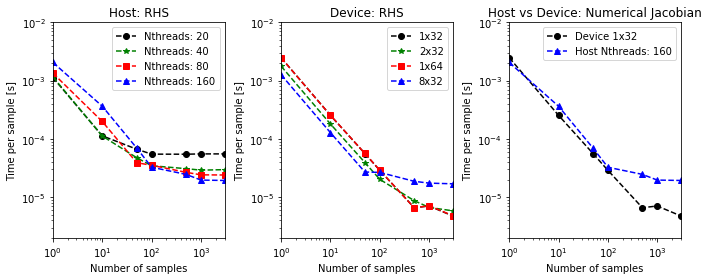

In [31]:
Npx=1
Npy=3
plt.figure(figsize=(10,Npx*4))
count_plot=1
x_label='Number of samples'
y_label='Time per sample [s]'
x_lim = [2e-6,1e-2]
y_lim = [1,3e3]
   
plt.subplot(Npx, Npy, 1)
plt.title('Host: RHS')
for j in range(4):
    plt.plot(Nsp,data[0,:,j],plot_marker[j],label="Nthreads: "+str(Nthreads[j]))
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(x_lim)
    plt.xlim(y_lim)
    plt.legend(loc='best')  
    plt.ylabel(y_label)
    plt.xlabel(x_label) 

plt.subplot(Npx, Npy, 2)
plt.title('Device: RHS')
for i in range(len(source_team_vector)):
    plt.plot(Nsp,source_data[:,i],plot_marker[i],label=  source_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

s_source=0
plt.subplot(Npx, Npy, 3)
plt.title('Host vs Device: Numerical Jacobian')

plt.plot(Nsp,source_data[:,s_source],plot_marker[s_source],label= 'Device '+ source_team_vector[s_source])
plt.plot(Nsp,data[0,:,3],plot_marker[3],label="Host Nthreads: "+str(Nthreads[3]))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)
plt.tight_layout()

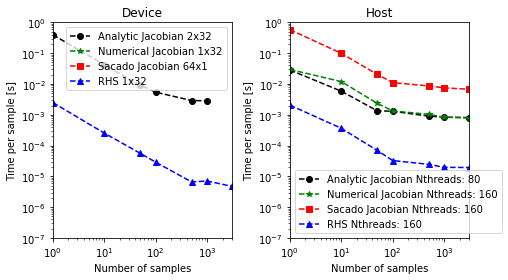

In [32]:
Npx=1
Npy=3
x_lim = [1e-7,1]
y_lim = [1,3e3]
plt.figure(figsize=(10,Npx*4))
plt.subplot(Npx, Npy, 1)
plt.title('Device')
# s_anal_jac = 2
plt.plot(Nsp,analytic_data[:,s_anal_jac],plot_marker[0],label= 'Analytic Jacobian '+ analytic_team_vector[s_anal_jac])
plt.plot(Nsp,numerical_data[:,s_num_jac],plot_marker[1],label= 'Numerical Jacobian '+ numerical_team_vector[s_num_jac])
plt.plot(Nsp,sacado_data[:,s_sac_jac],plot_marker[2],label= 'Sacado Jacobian '+ sacado_team_vector[s_sac_jac])
plt.plot(Nsp,source_data[:,s_source],plot_marker[3],label= 'RHS '+ source_team_vector[s_source])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

plt.subplot(Npx, Npy, 2)
plt.title('Host')
# s_anal_jac = 2
plt.plot(Nsp,data[1,:,2],plot_marker[0],label="Analytic Jacobian Nthreads: "+str(Nthreads[2]))
plt.plot(Nsp,data[1,:,3],plot_marker[1],label="Numerical Jacobian Nthreads: "+str(Nthreads[3]))
plt.plot(Nsp,data[4,:,3],plot_marker[2],label="Sacado Jacobian Nthreads: "+str(Nthreads[3]))
plt.plot(Nsp,data[0,:,3],plot_marker[3],label="RHS Nthreads: "+str(Nthreads[3]))
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')
plt.ylim(x_lim)
plt.xlim(y_lim)

plt.tight_layout()